# Day 24: RNN Introduction

Welcome to Day 24!

Today you’ll learn:

1. What Recurrent Neural Networks (RNNs) are
2. How RNNs handle sequence data (time series, text, audio)
3. The concept of a hidden state and memory
4. Unrolling RNNs across time steps
5. How information flows from past to future
6. Manual forward pass of a tiny sequence
7. How hidden states evolve over time (visualized)

By the end of this notebook, you will be able to mentally simulate an RNN and understand why it is different from a normal feedforward network.

If you found this notebook helpful, your **<b style="color:red;">UPVOTE</b>** would be greatly appreciated! It helps others discover the work and supports continuous improvement.

---

# What is a Recurrent Neural Network (RNN)?

Recurrent Neural Networks (RNNs) are a special class of neural networks designed for sequential data. Unlike traditional feedforward networks that process inputs independently, RNNs have memory, they retain information from previous inputs to inform current processing.

- RNNs are designed for sequence data:
    - Text, audio, video, time series
- Unlike normal neural networks, RNNs remember previous inputs via a hidden state
- They process sequences one element at a time while maintaining memory

Key idea:
> “RNNs have a memory of the past that influences the present.”

- RNN = Feedforward network + memory
- Analogy: Reading a sentence word by word: each new word is interpreted in the context of the words before it.

In [1]:
# Example sequence: temperature readings over 5 days
sequence = [30, 32, 31, 33, 34]

print("Sequence data:", sequence)

Sequence data: [30, 32, 31, 33, 34]


- Each number represents a time step
- Goal: predict the next number in the sequence
- Hidden state carries memory of previous numbers


## Why RNN?

1. **Sequential dependencies exist in real-world data**
   - Many tasks require understanding context over time:
     - Text: “The cat sat on the …” → next word depends on previous words
     - Audio: Current sound depends on previous samples
     - Time series: Stock price today depends on past prices
   - Feedforward networks treat inputs as independent, ignoring order and context.  

2. **Ability to model variable-length sequences**
   - Sentences, audio clips, and time series can have different lengths.
   - RNNs process sequences step by step, sharing weights across time, so the network can generalize to sequences of different lengths.

3. **Memory of past inputs**
   - RNNs maintain a hidden state $h_t$ that summarizes information from all previous steps.
   - This memory allows the network to influence current predictions based on past events.

> Simply put: RNNs exist because sequences cannot be modeled well with ordinary neural networks.


## How RNNs work

Hidden State (h)

- Represents memory of the network
- Updated at each time step
- Captures past information relevant for prediction

At each time step $t$, the RNN updates its hidden state based on:
1. Current input $x_t$
2. Previous hidden state $h_{t-1}$  

Mathematically:
$$
h_t = f(W_{xh} x_t + W_{hh} h_{t-1} + b_h)
$$

Where:  
- $x_t$ → input at time $t$  
- $h_{t-1}$ → memory from previous step  
- $W_{xh}, W_{hh}$ → weight matrices  
- $f$ → activation function (commonly `tanh` or `ReLU`)  
- $b_h$ → bias  

**Key point:** The same weights are used at every time step → allows generalization across sequences of different lengths.


## Real-World Examples

| Task | Sequential Data | How RNN helps |
|------|----------------|---------------|
| Text prediction | “The cat sat on the …” | Predict next word using prior words |
| Time series forecasting | Stock prices | Model trends and seasonal patterns |
| Speech recognition | Audio signal | Understand phonemes in context |
| Video analysis | Sequence of frames | Recognize actions over time |


# What is a Time Step in RNNs?

A time step is one position in a sequence at which the RNN processes exactly one input element and updates its memory (hidden state).

> Time step ≠ clock time  
> Time step = sequence index

Given a sequence:
$$
X = [x_1, x_2, x_3, \dots, x_T]
$$

- Each $x_t$ is processed at time step $t$
- $T$ = total number of time steps (sequence length)

At each time step:
1. The RNN receives input $x_t$
2. Combines it with previous hidden state $h_{t-1}$
3. Produces a new hidden state $h_t$
4. (Optionally) produces an output $y_t$

Mathematically:
$$
h_t = f(W_{xh}x_t + W_{hh}h_{t-1} + b)
$$




## Why “time” step is a misleading name

The word "time" is historical, it does not always mean real time.

A time step can represent:
| Domain | What one time step means |
|------|--------------------------|
| Text | One word / one character |
| Time series | One measurement (day, hour, second) |
| Audio | One frame / window of samples |
| Video | One frame |
| DNA | One nucleotide |

> RNNs don’t care about *time*, they care about *order*.

**Example 1: Text Sentence**

"I love deep learning"

Tokenized:

[$x_1$="I", $x_2$="love", $x_3$="deep", $x_4$="learning"]

- Time step 1 → "I"
- Time step 2 → "love"
- Time step 3 → "deep"
- Time step 4 → "learning"

Each word is processed one at a time, in order.

**Example 2: Time Series**

Temperature over days:

[30, 32, 31, 33, 34]

- Time step 1 → Day 1 (30°C)
- Time step 2 → Day 2 (32°C)
- Time step 3 → Day 3 (31°C)
- …

Here, time step does correspond to real time, but that’s optional.

**Example 3: Audio**
- Audio is split into short frames (e.g., 25 ms windows)
- Each frame = one time step
- RNN learns how sound evolves frame by frame


## What happens inside one time step?

At time step $t$:
- Input: $x_t$
- Memory coming in: $h_{t-1}$
- Memory going out: $h_t$

Visual:

$$x_t + h_{t-1} → [RNN - Cell] → h_t$$

This is why RNNs have memory, every time step carries information forward.


## Important Clarification

❌ **Wrong mental model**:
> “Each time step is a different neural network”

✅ **Correct mental model**:
> “The SAME neural network is reused at every time step”

- Same weights
- Same structure
- Different inputs and hidden states

This reuse is why we say RNNs are unrolled across time.

# RNN Unrolling

RNN unrolling is a visual and conceptual tool that shows how a single RNN cell is
reused across multiple time steps in a sequence.

Unrolling does NOT create new networks, it reveals the repeated application of the same network over time.

In its compact form, an RNN looks like this:

>Input sequence → [ RNN Cell ] → Output sequence

This hides what is actually happening over time.

Given a sequence:
$$
x_1, x_2, x_3, \dots, x_T
$$

The RNN is unrolled as:

```
x₁ → [RNN] → h₁ → y₁
↑
h₀

x₂ → [RNN] → h₂ → y₂
↑
h₁

x₃ → [RNN] → h₃ → y₃
↑
h₂
```
Each block is the same RNN cell, not a new one.

## What actually changes across time steps?

| Component | Changes? | Why |
|---------|----------|-----|
| Input $x_t$ | Yes | New element of the sequence |
| Hidden state $h_t$ | Yes | Memory evolves |
| Weights ($W_{xh}, W_{hh}$) | No | Shared across time |
| Bias | No | Shared |

> Weight sharing is what allows RNNs to handle variable-length sequences.


## Mathematical view of unrolling

At each time step $t$:
$$
h_t = f(W_{xh}x_t + W_{hh}h_{t-1} + b)
$$

Unrolling simply applies this same equation repeatedly:
- Step 1: uses $h_0$
- Step 2: uses $h_1$
- Step 3: uses $h_2$
- …

No new parameters are introduced.

## Why unrolling matters

Unrolling makes three critical things visible:

**1️. Memory flow**
- Information flows only forward in time
- Earlier inputs influence later outputs via hidden states

**2️. Backpropagation Through Time (BPTT)**
- During training, gradients flow backward through the unrolled chain
- Long chains → vanishing or exploding gradients

**3️. Model limitations**
- The longer the unrolled sequence:
  - The harder it is to preserve long-term information
  - The more unstable training becomes


In short:
> RNN unrolling is the process of visualizing how a single RNN cell processes a sequence step by step while passing memory forward through hidden states.


# Manual Forward Pass of an RNN

To truly understand an RNN, we must manually compute how the hidden state evolves over time.

We will use:
- A tiny sequence
- Scalar weights
- A single hidden unit
- No output layer (focus purely on memory)


Input sequence:
$$
x = [1,\;2,\;3]
$$

Initial hidden state:
$$
h_0 = 0
$$

Weights and bias:
$$
W_{xh} = 0.8,\quad W_{hh} = 0.5,\quad b = 0
$$

Activation function:
$$
\tanh(\cdot)
$$

Update rule:
$$
h_t = \tanh(W_{xh}x_t + W_{hh}h_{t-1} + b)
$$


**Time Step 1 (t = 1)**

Input:
$$
x_1 = 1
$$

Hidden state update:
$$
h_1 = \tanh(0.8 \cdot 1 + 0.5 \cdot 0)
$$
$$
h_1 = \tanh(0.8)
$$
$$
h_1 \approx 0.664
$$


**Time Step 2 (t = 2)**

Input:
$$
x_2 = 2
$$

Hidden state update:
$$
h_2 = \tanh(0.8 \cdot 2 + 0.5 \cdot h_1)
$$
$$
h_2 = \tanh(1.6 + 0.332)
$$
$$
h_2 = \tanh(1.932)
$$
$$
h_2 \approx 0.959
$$

**Time Step 3 (t = 3)**

Input:
$$
x_3 = 3
$$

Hidden state update:
$$
h_3 = \tanh(0.8 \cdot 3 + 0.5 \cdot h_2)
$$
$$
h_3 = \tanh(2.4 + 0.480)
$$
$$
h_3 = \tanh(2.88)
$$
$$
h_3 \approx 0.994
$$


**Final hidden states**

$$
[h_1,\; h_2,\; h_3] \approx [0.664,\;0.959,\;0.994]
$$

In [2]:
import numpy as np

# Tiny sequence
x = np.array([1, 2, 3])
h = 0  # initial hidden state
Whh = 0.5
Wxh = 0.8
b = 0.0

hidden_states = []

for t in x:
    h = np.tanh(Whh*h + Wxh*t + b)  # update hidden state
    hidden_states.append(h)

hidden_states


[np.float64(0.664036770267849),
 np.float64(0.9588962368206502),
 np.float64(0.9937106571090586)]

Explanation:

- Start with `h=0` (no memory)
- Each step updates hidden state based on previous state + current input
- `tanh` squashes values to keep them stable


In [3]:
print("Input sequence:", x)
print("Hidden states:", np.round(hidden_states, 3))


Input sequence: [1 2 3]
Hidden states: [0.664 0.959 0.994]


Interpretation:

- `h1` influenced only by `x1`

- `h2` influenced by `x1` and `x2`

- `h3` influenced by `x1`, `x2`, `x3`

This demonstrates temporal dependency.

# Visualize Hidden States

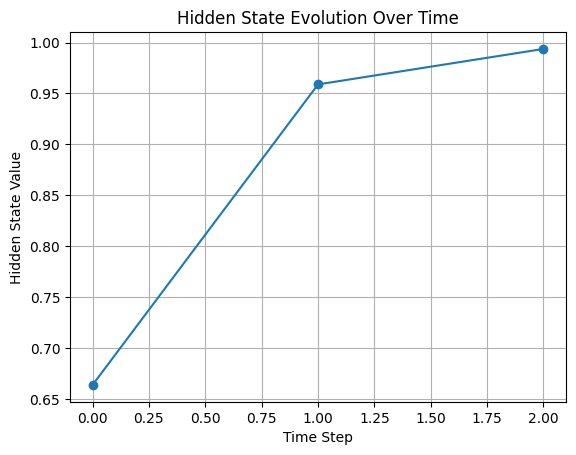

In [4]:
import matplotlib.pyplot as plt

plt.plot(hidden_states, marker='o', linestyle='-')
plt.title("Hidden State Evolution Over Time")
plt.xlabel("Time Step")
plt.ylabel("Hidden State Value")
plt.grid(True)
plt.show()


- Shows how memory accumulates over the sequence
- Useful for understanding influence of past inputs

# Key Takeaways from Day 24

- RNNs process sequential data, maintaining a hidden state
- Hidden state = memory of previous inputs
- Weights are shared across time steps
- Unrolling visualizes repeated application of the same cell
- Manual forward pass shows how hidden state evolves
- This sets the stage for PyTorch RNN implementation

---

<p style="text-align:center; font-size:18px;">
© 2026 Mostafizur Rahman
</p>
